*Copyright 2024 Jaeyoung Chun*

You may not make copies of this and use or distribute it for any purpose.

# Detecting Objects in Video

In [1]:
import os
from tqdm import tqdm

## Drone Video

### Input

In [2]:
path_data = "./data"

In [3]:
# path to the image file
path_source = os.path.join(path_data, "drone-video-original.mp4")

### Output

In [4]:
path_out = "./data/frames"

In [5]:
os.makedirs(path_out, exist_ok=True)

## Load Pre-trained Model


| Model                                                                                | size<br><sup>(pixels) | mAP<sup>val<br>50-95 | Speed<br><sup>CPU ONNX<br>(ms) | Speed<br><sup>A100 TensorRT<br>(ms) | params<br><sup>(M) | FLOPs<br><sup>(B) |
| ------------------------------------------------------------------------------------ | --------------------- | -------------------- | ------------------------------ | ----------------------------------- | ------------------ | ----------------- |
| YOLOv8n | 640                   | 37.3                 | 80.4                           | 0.99                                | 3.2                | 8.7               |
| YOLOv8s | 640                   | 44.9                 | 128.4                          | 1.20                                | 11.2               | 28.6              |
| YOLOv8m | 640                   | 50.2                 | 234.7                          | 1.83                                | 25.9               | 78.9              |
| YOLOv8l | 640                   | 52.9                 | 375.2                          | 2.39                                | 43.7               | 165.2             |
| YOLOv8x | 640                   | 53.9                 | 479.1                          | 3.53                                | 68.2               | 257.8             |

In [6]:
from ultralytics import YOLO

In [7]:
model = YOLO("yolov8n.pt")

## Inference

In [8]:
# run the inference on the image
results = model(path_source, stream=True, verbose=False)

### First Frame

In [9]:
for result in results:
    print(result)   
    break

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

#### Original Image

In [10]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
img_bgr = result.orig_img

In [12]:
# cv2 BGR format to RGB format 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

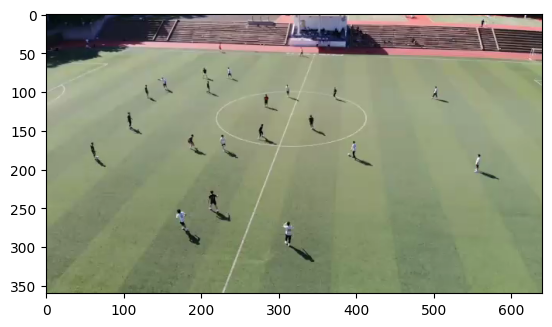

In [13]:
fig, ax = plt.subplots()

ax.imshow(img_rgb)

plt.show()

#### Class Names

In [14]:
result.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [15]:
len(result.names)

80

#### Results

In [16]:
result.boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 0.,  0.,  0., 14.,  0., 14., 14., 14.,  0., 14.])
conf: tensor([0.5824, 0.5086, 0.4049, 0.3705, 0.3167, 0.3047, 0.2686, 0.2638, 0.2618, 0.2501])
data: tensor([[3.0668e+02, 2.6813e+02, 3.1977e+02, 2.9952e+02, 5.8241e-01, 0.0000e+00],
        [2.7363e+02, 1.4222e+02, 2.8247e+02, 1.6277e+02, 5.0856e-01, 0.0000e+00],
        [3.9150e+02, 1.6456e+02, 4.0150e+02, 1.8652e+02, 4.0491e-01, 0.0000e+00],
        [5.7002e+01, 1.6484e+02, 7.7484e+01, 1.9871e+02, 3.7046e-01, 1.4000e+01],
        [2.7405e+02, 1.4216e+02, 2.8645e+02, 1.6733e+02, 3.1669e-01, 0.0000e+00],
        [1.2755e+02, 9.2680e+01, 1.4485e+02, 1.1514e+02, 3.0472e-01, 1.4000e+01],
        [1.2808e+02, 1.0395e+02, 1.4448e+02, 1.1514e+02, 2.6863e-01, 1.4000e+01],
        [2.2887e+02, 1.7705e+02, 2.4887e+02, 1.8678e+02, 2.6382e-01, 1.4000e+01],
        [4.9764e+02, 9.3555e+01, 5.0763e+02, 1.1280e+02, 2.6178e-01, 0.0000e+00],
        [5.7130e+01, 1.7714e+02, 7.7984

#### Display

In [17]:
result.show()

#### Write to File

In [18]:
result.save(filename=os.path.join(path_out, "frame001.jpg"))

'./data/frames/frame001.jpg'

#### Found Classes

In [19]:
result.boxes.cls

tensor([ 0.,  0.,  0., 14.,  0., 14., 14., 14.,  0., 14.])

In [20]:
result.boxes.cls.unique()

tensor([ 0., 14.])

In [21]:
result.names[0]

'person'

In [22]:
result.names[14]

'bird'

#### Bounding Box

In [23]:
result.boxes.xywh

tensor([[313.2248, 283.8235,  13.0928,  31.3915],
        [278.0522, 152.4938,   8.8349,  20.5453],
        [396.5035, 175.5384,   9.9994,  21.9603],
        [ 67.2431, 181.7776,  20.4819,  33.8732],
        [280.2494, 154.7443,  12.3964,  25.1719],
        [136.2009, 103.9115,  17.2968,  22.4633],
        [136.2774, 109.5481,  16.3998,  11.1887],
        [238.8695, 181.9156,  20.0029,   9.7222],
        [502.6358, 103.1765,   9.9863,  19.2430],
        [ 67.5568, 187.8086,  20.8534,  21.3362]])

### Continue

In [24]:
n = 2

objects = set()

for result in tqdm(results):
    filename = os.path.join(path_out, f"frame{n:03d}.jpg")
    result.save(filename)
    n += 1

340it [00:23, 14.23it/s]


## Convert Images to Video

**Mac**

```
ffmpeg -framerate 30 -pattern_type glob -i 'data/frames/*.jpg' -c:v libx264 -pix_fmt yuv420p data/drone-video-object-detected.mp4
```

**Windows**

```
ffmpeg -framerate 30 -i data/frames/frame%03d.jpg -c:v libx264 -pix_fmt yuv420p data/drone-video-object-detected.mp4
```